<font size=4 color='blue'>

# <center>Clase 10, diciembre 2 del 2020</center>


<font size=5 color="blue">

Convolutional Neural Networks

<font size=4 color="black">

[Interactive Visualizing of Convolutional Neural Networks](./literature/CNN-explainer_2020.pdf)

<font size=4>
    

Some applications of these networks:

- Object recognition.

<img src='images/clasification.jpeg' style="width: 800px;"/>

- Object detection; for example in a camera for face detection or in autonomous vehicles.

<img src='images/detection.jpeg' style="width: 300px;"/>


- Neural Style Transfer: two images are superimposed to mixe their content.

<img src='images/style.jpeg' style="width: 800px;"/>
    

<font size=5 color="blue">

Convolution of two functions   

<font size=4 color="black">
    
Given the functions *f* and *g* over the finite range [0,t], their convolution is given by:
    
$$  [f*g] = \int_0^1 f(\tau)g(t-\tau) d\tau$$

<font size=4 color="black">

Definition of the functions $f_1$ and $f_2$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

f1 = lambda t: np.maximum(0, 1-abs(t))
f2 = lambda t: (t>0) * np.exp(-2*t)


In [ ]:
Fs = 50  # our sampling frequency for the plotting
T = 5    # the time range we are interested in
t = np.arange(-T, T, 1/Fs)  # the time samples

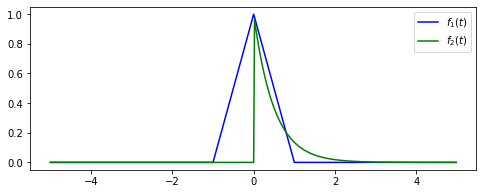

In [ ]:
plt.figure(figsize=(8,3))
plt.plot(t, f1(t), color='blue', label='$f_1(t)$')
plt.plot(t, f2(t), color='green', label='$f_2(t)$')
plt.legend(['$f_1(t)$', '$f_2(t)$'], loc='upper right')


<font size=4 color="black">

Convolution of $f_1$ and $f_2$
    
The shaded area is the result of the convolution.

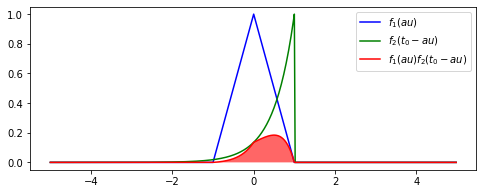

In [ ]:
from IPython.display import HTML
import scipy
from scipy import integrate
import pylab as p


t0 = 1
flipped = lambda tau: f2(t0-tau)
product = lambda tau: f1(tau)*f2(t0-tau)

plt.figure(figsize=(8,3))

plt.plot(t, f1(t), color='blue',label=r'$f_1(\tau)$')
plt.plot(t, flipped(t), color='green',label=r'$f_2(t_0-\tau)$')
plt.plot(t, product(t), color='red',label=r'$f_1(\tau)f_2(t_0-\tau)$')
p.fill(t, product(t),facecolor='red', alpha=0.6)
         
plt.legend(['$f_1(\tau)$', '$f_2(t_0-\tau)$','$f_1(\tau)f_2(t_0-\tau)$'], loc='upper right')

# Explicitely calculate the integral, using the Simpson integration rule
display(HTML("Result of the convolution (red shaded area): \
$(f_1*f_2)(t_0=%.0f) = %.2f$" % (t0, scipy.integrate.simps(product(t), t))))

<font size=4 color="black">

Convolution of $f_1$ and $f_2$ at different times

In [ ]:
def showConvolution(f1, f2, t0):
    # Calculate the overall convolution result using Simpson integration
    convolution = np.zeros(len(t))
    for n, t_ in enumerate(t):
        prod = lambda tau: f1(tau) * f2(t_-tau)
        convolution[n] = scipy.integrate.simps(prod(t), t)
    
    # Create the shifted and flipped function
    f_shift = lambda t: f2(t0-t)
    prod = lambda tau: f1(tau) * f2(t0-tau)

    # Plot the curves

    plt.subplot(211)
    plt.plot(t, f1(t), color='blue',label=r'$f_1(\tau)$')
    plt.plot(t, f_shift(t), color='green',label=r'$f_2(t_0-\tau)$')
    plt.plot(t, prod(t), color='red', label=r'$f_1(\tau)f_2(t_0-\tau)$')
    p.fill(t, prod(t),facecolor='red', alpha=0.6)
    plt.legend(['$f_1(\tau)$', '$f_2(t_0-\tau)$','$f_1(\tau)f_2(t_0-\tau)$'], loc='upper right')
    
    # plot the convolution curve
    plt.subplot(212)
    plt.plot(t, convolution, label='$(f_1*f_2)(t)$')
    plt.legend(['$(f_1*f_2)(t)$'], loc='upper right')  
    
    # recalculate the value of the convolution integral at the current time-shift t0
    current_value = scipy.integrate.simps(prod(t), t)
    display(HTML("Result of the convolution (red shaded area): \
    $(f_1*f_2)(t_0=%.1f) = %.2f$" % (t0, current_value)))
    plt.plot(t0, current_value, 'ro')  # plot the point


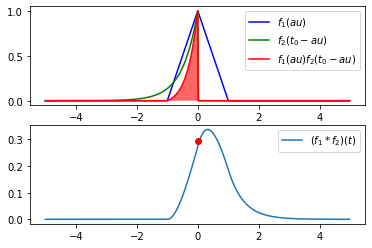

In [ ]:
showConvolution(f1,f2, 0)

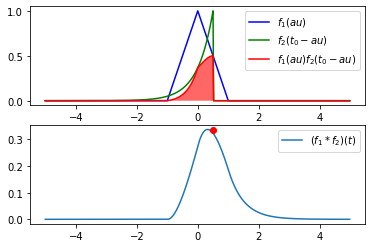

In [ ]:
showConvolution(f1,f2, 0.5)

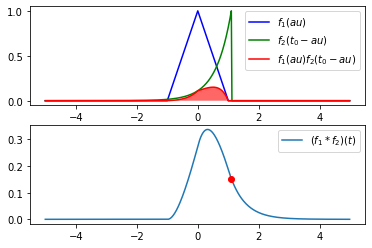

In [ ]:
showConvolution(f1,f2, 1.1)

<font size=5 color="blue">

Feature extraction using convolution and pooling layers
    

<font size=4 color="black">
    
[CNN, LeCun-90](./literature/lecun-90c.pdf)
    
[CNN, LeCun-Bengio-95](./literature/lecun-bengio-95a.pdf)

<font size=5 color="blue">

Convolution layer   

<font size=4 color='black'>

Convolution between a filter (kernel) and an image. 

<img src='./images/conv.gif' style="width: 400px;"/>


<font size=4 color='black'>

The left frame represents the input data. When it is an image each value corresponds to a pixel value.

The frame in the mittle represents the filter (kernel) with dimensions (3,3). The right frame represents the result of the convolution operation between filter and image.

The convolution operation starts at the left upper corner of the image. The filter is superpossed to the image: each pixel value in the image is multiplied by the corresponding filter value superimpossed on it. 

   0 x (−1) + 0 x (−2) + 75 x (−1) +
  
   0 x 0 + 75 x 0 + 80 x 0 +
$$ $$
   0 x 1 + 75 x 2 + 80 x 1 = 155.  

This is the value for the first pixel of the image produced by the convolution.

Then, the filter moves the stride *s* to the right and repeats the operation until it reaches the image right border. Thereafter, the filter moves the stride *s* down in the image, simultaneously it moves to the left of the image to repeat the convolution operation. 

The filter values are learned (represented by the corresponding weight values $\omega$) during training of the convolutional neural network.

<font size=4 color='black'>

In general, the stride to move the filter takes the value 1, but it can take any other integer value larger than 1. In the following example we illustrate a convolution using a stride value s = 2.


<img src='./images/stri.png' style="width: 700px;"/>


<font size=5 color='blue'>

Padding

<font size=4 color='black'>

The produced image after the convolution operations has a smaller dimension than the original image. 
    
<img src='./images/dimconv.png' style="width: 600px;"/>
    
Many times, it is desired  that the original and convoluted images have the same dimension. For getting this, the original image is padded with extra zero value pixels around it before the convolution operation is applied. 
    
<img src='./images/padd.png' style="width: 700px;"/>
    
The padding depends on filter size and stride. 

<font size=4 color='black'>

If the original image has dimensions *(n, n)*, and the filter has dimensions *(f, f)*, the dimension of the image after the convolution operation is given by the following realtionship:
    
$$[\dfrac{n+2p-f}{s}+1] x [\dfrac{n+2p-f}{s}+1]$$
    
where s and p are the stride and padding values respectively.


<font size=5 color='blue'>

Pooling layer

<font size=4 color='black'>

In general, after applying one or more convolutional layers, it is recommended to reduce the dimensions of the generated images. This is done by pooling neighboring pixels, which reduces the dimension of the image. For example, averaging (Average Pooling) locally the pixel values over a region or de image, or by taking into account only the pixels with the largest values (Max Pooling) in the local region. Sometimes the dimension reduction is more drastic (Global Average Pooling, Global Max Pooling).
    
Example of max pooling:
    
<img src='images/maxpool.gif' style="width: 400px;"/>


<font size=5 color='blue'>

Feed Forward "Full" connected layer

<font size=4 color='black'>

Finally, the ouput of the convolution and pooling layers is the input of a feed forward  "full" connected layer.
    
 <img src="./images/dropout_image.jpeg" width=600 height=600 align = "midle" >   

<font size=5 color='blue'>

Graph of the Convolutional Neural Network (CNN) correspondig to the Model 3

<font size=4 color='black'>

This is the model that generates the best accuracy in the present notebook.

<font size=5 color='blue'>

 <img src="./images/CNN_IMAGE_V3.png" width=800 height=800 align = "midle" >   

<font size=5 color='blue'>
Object Recognition through images using CNN

<font size=5 color='blue'>
CIFAR-10 database

<font size=4 color="black">

[80 million tiny images from internet](./literature/80millionImages.pdf)

The CIFAR-10 and CIFAR-100 are labeled subsets of a 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. 


 <font size=4 color='black'>   

The data base can be downloaded from the following URL: 
    
[CIFAR-10 data download](https://www.cs.toronto.edu/~kriz/cifar.html)

$$ $$
 The CIFAR-10 dataset consists of 60,000 32x32 colour images in 10 classes, with 6000 images per class. There are 50.000 training images and 10,000 test images.

The ten classes are:

 
| index | class name |
| --- | --- |
| 0 | airplane |
| 1 | automobile | 										
| 2 | bird |										
| 3 | cat |										
| 4 | deer |										
| 5 | dog |										
| 6 | frog |										
| 7 | horse |										
| 8 | ship |										
| 9 | truck|

In [3]:
import keras

from keras import layers
from keras.layers import Input, Dense, Activation, Flatten
from keras.layers import Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.optimizers import SGD
import keras.backend as K

from keras.layers import BatchNormalization                       
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
import time


import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import pickle


np.random.seed(1)

%matplotlib inline

<font size = 5 color="blue">

CIFAR-10 data is also available from Keras: 
    


<font size = 4 color="black">

[CIFAR-10 Keras](https://keras.io/api/datasets/cifar10/)

In [4]:
from keras.datasets import cifar10

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 54s 0us/step


In [6]:
print('The type of x_train is', type(x_train))
print('The type of y_train is', type(y_train))

print('\nThe type of x_test is', type(x_test))
print('The type of y_test is', type(y_test))

The type of x_train is <class 'numpy.ndarray'>
The type of y_train is <class 'numpy.ndarray'>

The type of x_test is <class 'numpy.ndarray'>
The type of y_test is <class 'numpy.ndarray'>


In [7]:
print('The shape of x_train is', x_train.shape)
print('The shape of y_train is', y_train.shape)

print('\nThe shape of x_test is', x_test.shape)
print('The shape of y_test is', y_test.shape)

The shape of x_train is (50000, 32, 32, 3)
The shape of y_train is (50000, 1)

The shape of x_test is (10000, 32, 32, 3)
The shape of y_test is (10000, 1)


<font size=5 color="blue">

Analyzing the data extracted from CIFAR-10

<font size=5 color="blue">
    
View a sample from the data sets

<font size=4 color="black">
    
The input for a sample of the data sets is an array, where each value is the value of a single pixel. 

In [11]:
sample = 0
print("The features of a training sample \n \n", x_train[sample])

The features of a training sample 
 
 [[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


<font size=4 color="black">
    
Each value of X in the example is between 0 and 255, they are not normalized.

In [8]:
# We define a dictionary to associate the class number to a class name.

dic = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 
       5: 'dog', 6: 'frog', 7:'horse', 8: 'ship', 9: 'truck'}

<font size=5 color="blue">
    
Showing the image and label(y) of any sample


The y value of the first training sample is 6
It correspons to a frog


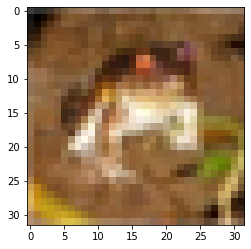

In [12]:
plt.imshow(x_train[sample]);

print("\nThe y value of the first training sample is",np.squeeze(y_train[sample]))
print("It correspons to a", dic[int(np.squeeze(y_train[sample]))])

<font size=5 color="blue">

Features (X values) normalization


<font size=4 color="black">
To normalize x values, we divide them by 255

In [9]:
train_x = x_train/255
test_x = x_test/255

<font size=4 color="black">    

Now the pixel values are between 0 and 1.

In [13]:
train_x[sample]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

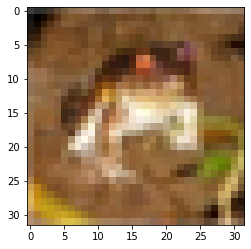

In [14]:
plt.imshow(train_x[sample])

In [15]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

<font size=5 color='blue'>
One-hot encoding of target variable (y)

<font size=4 color='black'>
The target value can have one of ten elements (classes), the digits (0, 1, 2, 3, 4, 5, 6, 7, 8, 9). 

The sets train_y and test_y are arrays in which each entry contains a digit represented as a integer of 64 bits.
    
We change this representation to a vector following the One-hot encoding 
[One-hot encoding](https://en.wikipedia.org/wiki/One-hot).
    
In One-Hot encoding, a digit is represented with a vector that has dimension 10 (because we have 10 classes) with 1.0 in the vector index corresponding to the digit and 0.0 elsewhere in the vector. 


In [16]:
y_train.shape

(50000, 1)

In [17]:
y_train.reshape(-1).shape

(50000,)

In [18]:
train_y = np.eye(10)[y_train.reshape(-1)]
test_y = np.eye(10)[y_test.reshape(-1)]

In [19]:
print(y_train[0:5])

[[6]
 [9]
 [9]
 [4]
 [1]]


In [20]:
train_y[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

<font size=5 color="blue">
    
Viewing one sample from the data set.

The sample 9 corresponds to a cat
Its one-hot representation is = [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


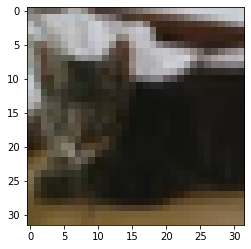

In [ ]:
sample = 9

plt.imshow(train_x[sample]);

print('The sample', sample, 'corresponds to a', dic[int(np.argmax(train_y[sample]))])
print("Its one-hot representation is =", train_y[sample])

<font size=4 color="black">
    
In summary, the training and test sample sets have the following dimensions:

In [21]:
print ("number of training examples = " + str(train_x.shape[0]))
print ("number of test examples = " + str(test_x.shape[0]))
print ("X_train shape: " + str(train_x.shape))
print ("Y_train shape: " + str(train_y.shape))
print ("X_test shape: " + str(test_x.shape))
print ("Y_test shape: " + str(test_y.shape))

number of training examples = 50000
number of test examples = 10000
X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 10)


<font size=5 color="blue">

Building the Learning System

<font size=5 color='blue'>

Definition of the neural network architecture

<font size=5 color='black'> 
    
Keras has two different modes to define the architecture:

<font size=4 color='black'> 
    
1.- The sequential model. It is a sequential stack of layers.
    
2.- The functional API. It is the way to go for defining complex models, such as multi-output models, directed acyclic graphs, or models with shared layers.  

In the present case, we will use the first mode to build the network architecture.
    
Documentation: [Keras Sequential class](https://keras.io/api/models/sequential/)

<font size=4 color='black'>    
The softmax activation function is always used for classification when the number (K) of classes is greater than two: 

![image.png](attachment:image.png)    

<font size=5 color='blue'>

Construction of the architecture for several models

<font size=4 color='black'>

[CNN, Keras](https://keras.io/api/layers/convolution_layers/)

<font size=5 color='red'>

To activate a model, change the content of the respective markdown cell to code

#Model 000-9
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):
    
    model = Sequential()
    
    model.add(Conv2D(12, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer

    model.add(Conv2D(12, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer

    model.add(MaxPooling2D()) 
               
    model.add(Conv2D(12, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer

    model.add(Conv2D(12, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer

    model.add(Conv2D(12, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer
 
    
    
    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())      
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_Cifar10Model'))
    
    return model


#Model 000-8
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):
    
    model = Sequential()
    
    model.add(Conv2D(12, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer

    model.add(Conv2D(12, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer

    model.add(MaxPooling2D()) 
               
    model.add(Conv2D(12, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer

    model.add(Conv2D(12, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer

    model.add(MaxPooling2D()) 
    
    
    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())      
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_Cifar10Model'))
    
    return model


#Model 000-7
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):
    
    model = Sequential()
    
    model.add(Conv2D(12, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer

    model.add(Conv2D(12, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer

    model.add(MaxPooling2D()) 
               
    model.add(Conv2D(12, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer

    model.add(Conv2D(12, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer

        
    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())      
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_Cifar10Model'))
    
    return model


#Model 000-6
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):
    
    model = Sequential()
    
    model.add(Conv2D(12, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer

    model.add(Conv2D(12, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer

    model.add(MaxPooling2D()) 
               
    model.add(Conv2D(12, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer
    
    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())      
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_Cifar10Model'))
    
    return model


#Model 000-5
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):
    
    model = Sequential()
    
    model.add(Conv2D(12, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer

    model.add(Conv2D(12, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer

    model.add(MaxPooling2D()) 
               
    
    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())      
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_Cifar10Model'))
    
    return model


#Model 000-4
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):
    
    model = Sequential()
    
    model.add(Conv2D(12, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer

    model.add(Conv2D(12, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer
               
    
    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())      
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_Cifar10Model'))
    
    return model


#Model 000-3
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):
    
    model = Sequential()
    
    model.add(Conv2D(12, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer
               
    
    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())      
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_Cifar10Model'))
    
    return model


In [22]:
#Model 000-3
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):
    
    model = Sequential()
    
    model.add(Conv2D(12, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer
               
    
    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())      
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_Cifar10Model'))
    
    return model


#Model 000-2
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):
    
    model = Sequential()
    
    model.add(Conv2D(9, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer
               
    
    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())      
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_Cifar10Model'))
    
    return model


#Model 000-1
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):
    
    model = Sequential()
    
    model.add(Conv2D(6, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer
               
    
    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())      
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_Cifar10Model'))
    
    return model


#Model 000
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):
    
    model = Sequential()
    
    model.add(Conv2D(3, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer
               
    
    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())      
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_Cifar10Model'))
    
    return model


#Model 00
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):
    
    model = Sequential()
    
    model.add(Conv2D(32, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer
               
    
    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())      
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_Cifar10Model'))
    
    return model


#Model 0
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):
    
    model = Sequential()
    
    model.add(Conv2D(32, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer
               
    model.add(MaxPooling2D()) 
    
    
    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())      
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_Cifar10Model'))
    
    return model


#Model 1
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):
    
    model = Sequential()
    
    model.add(Conv2D(32, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer
       
    model.add(Conv2D(32, 3, padding='same',kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  # Performing batch normalization to the convolution layer
        
    model.add(MaxPooling2D()) 
    
    
    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())      
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_Cifar10Model'))
    
    return model


#Model 1-1
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):
    
    model = Sequential()
    
    model.add(Conv2D(64, 3, padding='same', kernel_initializer='he_uniform',bias_initializer='zeros', \
                     input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer
       
    model.add(Conv2D(64, 3, padding='same',kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  # Performing batch normalization to the convolution layer
        
    model.add(MaxPooling2D()) 
    
    
    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())      
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_Cifar10Model'))
    
    return model


#Model 2
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):
    
    model = Sequential()
    
    model.add(Conv2D(32, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
       
    model.add(Conv2D(32, 3, padding='same',kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    model.add(MaxPooling2D())
    if batch_normalization:
        model.add(BatchNormalization())  # Performing batch normalization to the convolution layer

        
    model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
               
    model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    model.add(MaxPooling2D())
    if batch_normalization:
        model.add(BatchNormalization())  # Performing batch normalization to the convolution layer

    
    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())      
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_Cifar10Model'))
    
    return model


In [ ]:
#Model 3
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):
    
    model = Sequential()
    
    model.add(Conv2D(32, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer
       
    model.add(Conv2D(32, 3, padding='same',kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  # Performing batch normalization to the convolution layer
        
    model.add(MaxPooling2D()) 
    
    model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  # Performing batch normalization to the convolution layer
               
    model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  # Performing batch normalization to the convolution layer
    
    model.add(MaxPooling2D())
    
    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())      
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_Cifar10Model'))
    
    return model


#Model 3-1
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):
    
    model = Sequential()
    
    model.add(Conv2D(32, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer
       
    model.add(Conv2D(32, 3, padding='same',kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  # Performing batch normalization to the convolution layer
        
    model.add(MaxPooling2D()) 
    
    model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  # Performing batch normalization to the convolution layer
               
    model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  # Performing batch normalization to the convolution layer
    
    model.add(MaxPooling2D())
    
    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())      
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_Cifar10Model'))
    
    return model


In [41]:
#Model 3-1
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):
    
    model = Sequential()
    
    model.add(Conv2D(32, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))    
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer
       
    model.add(Conv2D(32, 3, padding='same',kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  # Performing batch normalization to the convolution layer
        
    model.add(MaxPooling2D()) 
    
    model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  # Performing batch normalization to the convolution layer
               
    model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  # Performing batch normalization to the convolution layer
    
    model.add(MaxPooling2D())
    
    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())  
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if batch_normalization:
        model.add(BatchNormalization())      
    if dropout:
        model.add(Dropout(0.30))
    
    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_Cifar10Model'))
    
    return model


#Model 4
def architecture(input_shape, num_classes, activation, dropout=False, batch_normalization=False):
    
    model = Sequential()
    
    #First convolution module    
    model.add(Conv2D(32, 3, padding='same', input_shape=input_shape))
    model.add(Activation(activation))
    model.add(MaxPooling2D())
    if batch_normalization: 
        model.add(BatchNormalization())  # Performing batch normalization to the output of the input layer
       
    #Second convolution module
    model.add(Conv2D(32, 3, padding='same',kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))
    model.add(MaxPooling2D())
    if batch_normalization:
        model.add(BatchNormalization())  # Performing batch normalization to the convolution layer
            
    #Third convolution module 
    model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))
    model.add(MaxPooling2D())
    if batch_normalization:
        model.add(BatchNormalization())  # Performing batch normalization to the convolution layer
        
    #Fourth convolution module
    model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))
    model.add(MaxPooling2D())
    if batch_normalization:
        model.add(BatchNormalization())  # Performing batch normalization to the convolution layer
    

    #Feed forward "full" connected module
    model.add(Flatten())
    if dropout:
        model.add(Dropout(0.30))
        
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if dropout:
        model.add(Dropout(0.30))
    if batch_normalization:
        model.add(BatchNormalization())  
    
    model.add(Dense(50, kernel_initializer='he_uniform',bias_initializer='zeros'))
    model.add(Activation(activation))    
    if dropout:
        model.add(Dropout(0.30))
    if batch_normalization:
        model.add(BatchNormalization())      
   
    model.add(Dense(num_classes))
    model.add(Activation('softmax',name='CNN_Cifar10Model'))
    
    return model


<font size=5 color="blue">

Building the neural network model for the learning system

In [42]:
one_image = (32, 32, 3)
activation='sigmoid'
num_classes=10
dropout=True
batch_normalization=True

cifar10_model = architecture(one_image,num_classes,activation,dropout,batch_normalization)

<font size=5 color="blue">
    
Graph of the model and summary

<font size=4 color='black'> 
The 'plot_model()' function generates a graphic with the layers and their number of input ands output weights.
$$ $$
Documentation: [Model visualization](https://keras.io/visualization/#training-history-visualization)

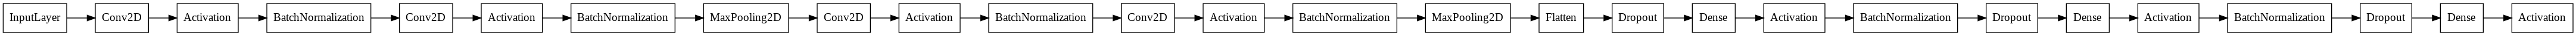

In [43]:
plot_model(cifar10_model, to_file='cifar10_blocks.png', show_shapes=False, rankdir='LR',show_layer_names=False)

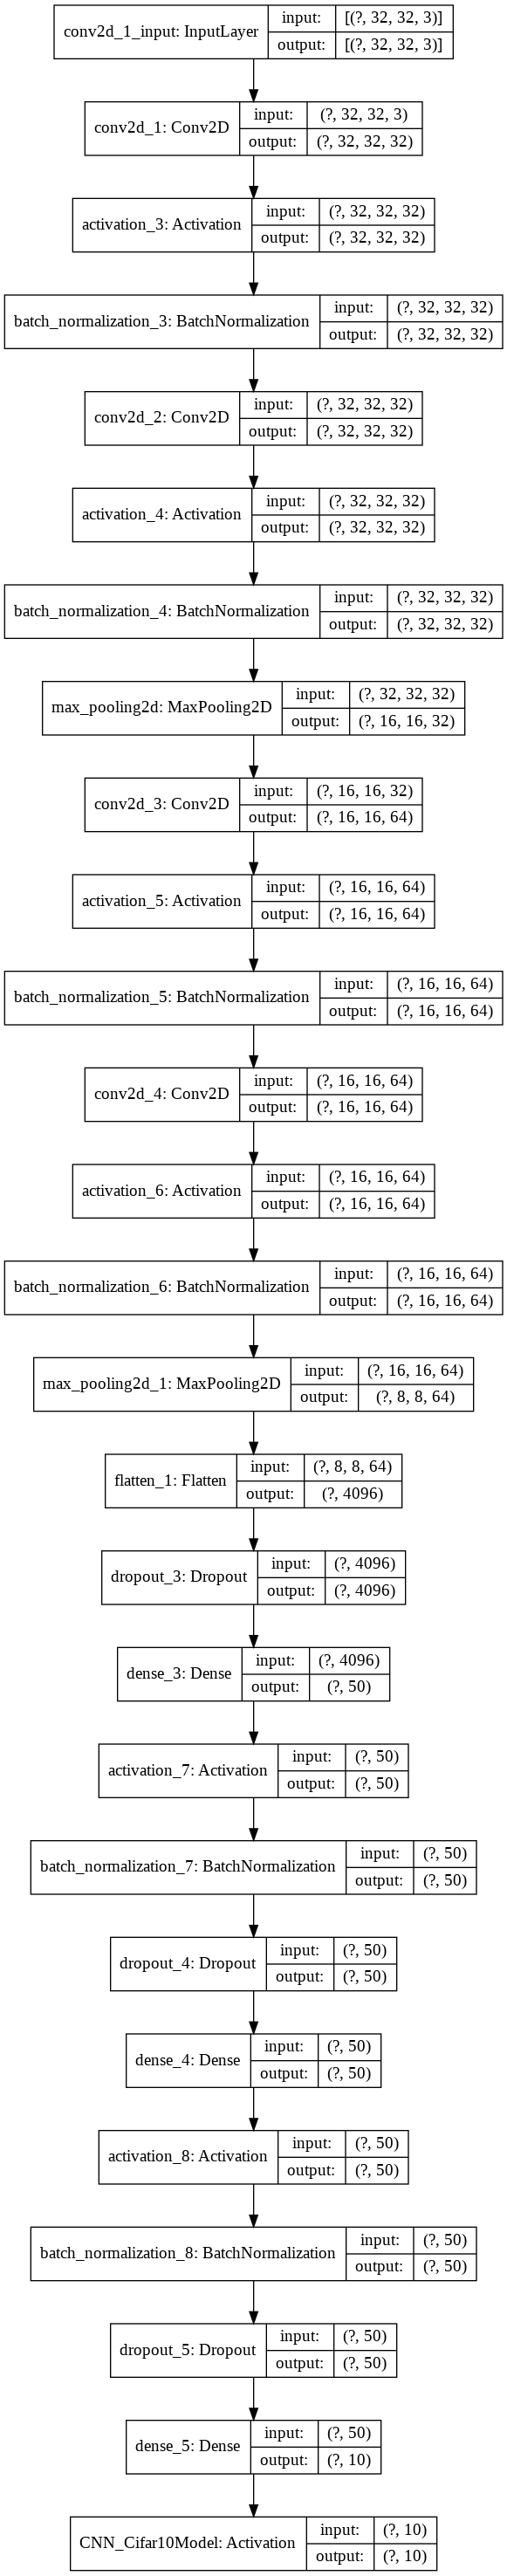

In [44]:
plot_model(cifar10_model, to_file='cifar10_model.png', show_shapes=True, rankdir='TB', show_layer_names=True)

In [45]:

cifar10_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_3 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)       

<font size=5 color='blue'>
Optimization method

<font size=3 color="black">
This requires defining the optimization algorithm, loss function and metric.
    
In the present case we are using the Stochastic Gradient descent algorithm with learning rate "lr", "momentum",  and without Nesterov acceleration".

This post also comments on some other optimization variants of this algorithm; Adagrad, Adadelta, RMStrop and Adam.

<font size=5 color='blue'>
Optimizer

<font size=5 color='blue'>
Mini-batch stocastic gradient descent(SGD) method.  

<font size=4 color='black'> 
The training samples are divided into mini-batches that have the size batch_size (B). Updates of weights and biases are based on an average of the gradient within each block of B samples. 
    
$$ \omega^{(t)} := \omega^{(t-1)} - \alpha \dfrac{1}{B} \sum_{t^1=Bt +1}^{B(t+1)}\dfrac{\partial J(x^{(t^1)},y^{(t^1)},\omega, b)}{\partial \omega}$$

$$ b^{(t)} := b^{(t-1)} - \alpha \dfrac{1}{B} \sum_{t^1=Bt +1}^{B(t+1)}\dfrac{\partial J(x^{(t^1)},y^{(t^1)},\omega, b)}{\partial b}$$

$ \alpha $ represents the learning rate and *t* represents an iteration. 
    
This method is specially useful for large sets of training data.
    
[Gradient-Based Training](./literature/Practical_rec_DL_Bengio_2012.pdf)

In [46]:
learning_rate = 0.01

optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.0, nesterov=False)

<font size=5 color='blue'>
The cost (loss) and Metric functions

<font size=4 color="black">
    
The cost function *J* is defined as "categorical_crossentropy"
    
$$ J = \frac{1}{m} \sum_{i=1}^m \sum_{k=0}^{K-1}(y_k^{(i)}*\log{(F_k(x^{(i)})))}$$
    
 where $F_k(x^{(i)})$ is the predicted value and $y_k^{(i)}$ is the target value for the sample *i*; *K* is the number of classes and *m* is the number of samples.    

A metric function is similar to a loss function, except that the results from evaluating a metric are not used when training the model. You may use any of the loss functions as a metric function. In the present example, we are using "accuracy" as metrics:
    
*Accuracy = Number of correct predictions / Total number of predictions made*
    

Categorical crossentropy will compare the distribution of the predictions (the activations in the output layer, one for each class) with the true distribution, where the probability of the true class is set to 1, and 0 for the other classes.

To put it in a different way, the true class is represented as an encoded vector, and the closer the model’s outputs are to that vector, the lower the loss.
    
Documentation: [keras.compile(...)](https://keras.io/models/model/#compile)

In [47]:
loss_function = 'categorical_crossentropy'
metric_function = 'accuracy'

<font size=5 color='blue'>
Compiling the model

In [48]:
cifar10_model.compile(optimizer = optimizer, loss = loss_function, metrics = [metric_function])

<font size=5 color='blue'>
    
Training the learning system

<font size=5 color='blue'>
    
Shuffle

<font size=4 color='black'>

Shuffling the training data before each epoch has a large effect on the loss associated with the test samples. Shuffling the training data, the samples for each mini-batch change with the epoch.
    
To speed up the convergence of weights and biases, it is also possible to fix the samples associated with each mini-batch. Then, the mini-batches will be called randomly in each epoch.  
    

<font size=5 color="blue">

Batch normalization

<font size=4 color="black">
    
[Batch normalization](./literature/Batch-normalization_2015.pdf)

<font size=4 color='black'>
    
Training Deep Neural Networks is complicated by the fact that the distribution of each  layer’sinputs changes during training, as the parameters of the previous layers change.
    
Batch Normalization allows us to use much higher learning rates and be less careful about initialization, and in some cases eliminates the need for Dropout.

<font size=4 color='black'>
    
Using batch normalization in a layer,tThe layer normalizes its output using the mean and standard deviation of the current batch of inputs. That is to say, for each channel being normalized, the layer returns (batch - mean(batch)) / (var(batch) + epsilon) * gamma + beta, where:

    epsilon is small constant (configurable as part of the constructor arguments)
    gamma is a learned scaling factor (initialized as 1), which can be disabled by passing scale=False to the constructor.
    beta is a learned offset factor (initialized as 0), which can be disabled by passing center=False to the constructor.


<font size=4 color='black'>
    
Importantly, batch normalization works differently during training and during inference.
    
[Batch Normalization in Keras](https://keras.io/api/layers/normalization_layers/batch_normalization/)

<font size=4 color="black">
    
Documentation: [keras.fit(...)](https://keras.io/models/model/#fit)

In [49]:
#10 % of the training data will be used to validate the training
validation_portion = 0.1
batch_size=128
num_epochs = 100

history = cifar10_model.fit(x=train_x, y=train_y, epochs=num_epochs, batch_size=batch_size, \
                            validation_split=validation_portion, shuffle=True, verbose=1)

Epoch 1/100
352/352 [==============================] - 5s 14ms/step - loss: 2.1059 - accuracy: 0.2991 - val_loss: 2.7902 - val_accuracy: 0.1546
Epoch 2/100
352/352 [==============================] - 5s 13ms/step - loss: 1.7296 - accuracy: 0.3930 - val_loss: 1.5052 - val_accuracy: 0.4590
Epoch 3/100
352/352 [==============================] - 5s 13ms/step - loss: 1.5898 - accuracy: 0.4360 - val_loss: 1.6021 - val_accuracy: 0.4330
Epoch 4/100
352/352 [==============================] - 5s 13ms/step - loss: 1.4879 - accuracy: 0.4687 - val_loss: 1.2323 - val_accuracy: 0.5650
Epoch 5/100
352/352 [==============================] - 5s 13ms/step - loss: 1.4123 - accuracy: 0.4966 - val_loss: 1.3522 - val_accuracy: 0.5144
Epoch 6/100
352/352 [==============================] - 5s 13ms/step - loss: 1.3474 - accuracy: 0.5217 - val_loss: 1.1908 - val_accuracy: 0.5856
Epoch 7/100
352/352 [==============================] - 5s 13ms/step - loss: 1.2873 - accuracy: 0.5434 - val_loss: 1.2817 - val_accuracy:

<font size=5 color="blue">
Graph of cost functions as a function of epoch

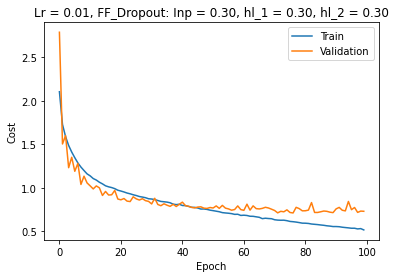

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Lr = 0.01, FF_Dropout: Inp = 0.30, hl_1 = 0.30, hl_2 = 0.30')
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

<font size=5 color="blue">
Graph of accuracy functions as a function of epoch

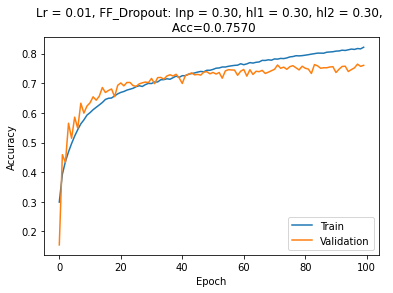

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Lr = 0.01, FF_Dropout: Inp = 0.30, hl1 = 0.30, hl2 = 0.30, \n Acc=0.0.7570')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

<font size = 5 color='blue'>
Loss and accuracy evaluation

<font size= 4 color='black'>    
After training the network, the loss and accuracy functions are evaluated using the test samples (test_x, test_y).    

    
[Method evaluate in Keras](https://keras.io/models/model/)

In [52]:
evaluations = cifar10_model.evaluate(x = test_x, y = test_y)

print ("Loss = " + str(evaluations[0]))
print ("Test Accuracy = " + str(evaluations[1]))


313/313 [==============================] - 1s 4ms/step - loss: 0.7565 - accuracy: 0.7545
Loss = 0.7565498948097229
Test Accuracy = 0.7544999718666077


In [53]:
# Evaluation using the first 100 samples of the test set

evaluations = cifar10_model.evaluate(x = test_x[:100], y = test_y[:100])

print ("Loss = " + str(evaluations[0]))
print ("Test Accuracy = " + str(evaluations[1]))


4/4 [==============================] - 0s 14ms/step - loss: 0.6509 - accuracy: 0.7700
Loss = 0.6509261131286621
Test Accuracy = 0.7699999809265137


<font size = 5 color='blue'>
Image prediction

<font size= 4 color='black'>    
The trained learning system can predict the object content of an image. For example, we take an image of the test dataset (test_x, test_y). 
    
[Method predict in Keras](https://keras.io/models/model/)

In [54]:
# Predicting the image associated to the each sample in the test set (X_test)
predictions = cifar10_model.predict(test_x)

In [55]:
sample = 31

<font size=4 color="black"> 
Displaying the image associated (not predicted!) to this sample.

the sample 31 corresponds to a dog


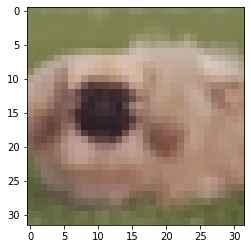

In [56]:

plt.imshow(test_x[sample].reshape((32, 32, 3)))

print('the sample', sample, 'corresponds to a', dic[int(np.argmax(test_y[sample]))])


In [57]:
# Predicting the image associated to the sample 
# np.argmax returns the index of the maximum value

prediction = np.argmax(predictions[sample])

print('For the sample number', sample, 'the prediction is a(n)', dic[prediction])

For the sample number 31 the prediction is a(n) dog


<font size = 4 color="black">
    
The next function finds the number of samples where the network made an incorrect prediction in a region of the test dataset. For example, in the first 40 samples from this dataset.

In [58]:

mislabeled_images = []

for i in range(len(test_x[:50])):
    
    if np.argmax(cifar10_model.predict(test_x)[i]) != np.argmax(test_y[i]):
        
        mislabeled_images.append(i)
 


mislabeled_images

[24, 25, 32, 33, 35, 36, 37, 40, 42, 49]

<font size=4 color='black'>
    
[Runs summary](Clase-10_figures.odt)